In [19]:
from IPython.display import Image
import numpy as np
from scipy import integrate
import matplotlib.pyplot as plt
import scipy as sp
import sympy as sym

%matplotlib inline

In [20]:
#Declaramos variables simbolicas
n= sym.Symbol('n')
t=sym.Symbol('t')

#Definimos funcion periodica...
#intervalos de la funcion
Tmin=0
Tmax=2*np.pi

T=Tmax-Tmin#periodo
w=2*np.pi/T#periodo 2pi
#w=frecuencia angular
#ft es una funcion simbolica
ft=t


In [21]:
#Calculamos coeficentes de Fourier

# Calcula la integral para a0
f_integral=ft
a0=(2/T)*sym.integrate(f_integral,(t,Tmin,Tmax))
print("a0= ")
sym.pprint(a0)
#Calcula la integral para an
f_integral=ft*sym.cos(n*w*t)
an=(2/T)*sym.integrate(f_integral,(t,Tmin,Tmax))
an=sym.simplify(an)
print("an= ")
sym.pprint(an)
#integral de bn
f_integral=ft*sym.sin(n*w*t)
bn=(2/T)*sym.integrate(f_integral,(t,Tmin,Tmax))
print("bn= ")
bn=sym.simplify(bn)
sym.pprint(bn)

a0= 
6.28318530717959
an= 
⎧2.0⋅n⋅sin(6.28318530717959⋅n) + 0.318309886183791⋅cos(6.28318530717959⋅n) - 0
⎪─────────────────────────────────────────────────────────────────────────────
⎪                                               2                             
⎨                                              n                              
⎪                                                                             
⎪                                      6.28318530717959                       
⎩                                                                             

.318309886183791                                                              
────────────────  for (n > -∞ ∨ n > 0) ∧ (n > -∞ ∨ n < ∞) ∧ (n > 0 ∨ n < 0) ∧ 
                                                                              
                                                                              
                                                                              
                        

In [22]:
#representar la expansion en series de fourier
serie=0
Armonicos=5

for i in range(1,Armonicos+1):
    #evaluar coeficientes para cada armonico
    an_c=an.subs(n,i)
    bn_c=bn.subs(n,i)
    if abs(an_c)<0.0001:an_c=0
    if abs(bn_c)<0.0001: bn_c=0
    serie=serie+an_c*sym.cos(i*w*t)
    serie=serie +bn_c*sym.sin(i*w*t)

    serie=a0/2+serie
    print('f(t)= ')
    sym.pprint(serie)

f(t)= 
3.14159265358979 - 2.0⋅sin(1.0⋅t)
f(t)= 
-2.0⋅sin(1.0⋅t) - sin(2.0⋅t) + 6.28318530717959
f(t)= 
-2.0⋅sin(1.0⋅t) - sin(2.0⋅t) - 0.666666666666667⋅sin(3.0⋅t) + 9.42477796076938
f(t)= 
-2.0⋅sin(1.0⋅t) - sin(2.0⋅t) - 0.666666666666667⋅sin(3.0⋅t) - 0.5⋅sin(4.0⋅t) +
 12.5663706143592
f(t)= 
-2.0⋅sin(1.0⋅t) - sin(2.0⋅t) - 0.666666666666667⋅sin(3.0⋅t) - 0.5⋅sin(4.0⋅t) -
 0.4⋅sin(5.0⋅t) + 15.707963267949


In [23]:
 #Grafica
fserie=sym.lambdify(t,serie)
f=sym.lambdify(t,ft)

v_tiempo=np.linspace(Tmin,Tmax,50)

fserieG=fserie(v_tiempo)
FG=f(v_tiempo)

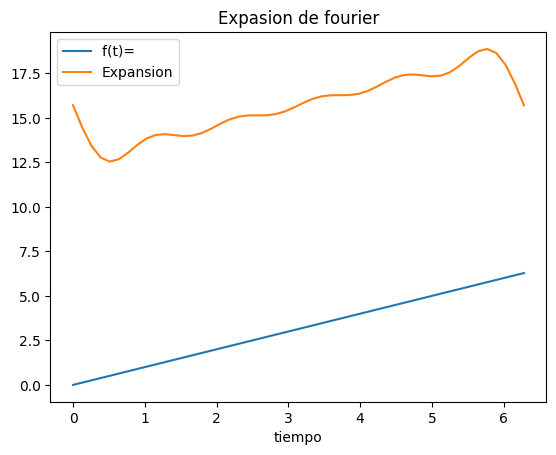

In [24]:
plt.plot(v_tiempo,FG,label='f(t)= ')
plt.plot(v_tiempo,fserieG,label= 'Expansion')
plt.xlabel('tiempo')
plt.legend()
plt.title("Expasion de fourier")

plt.show()